In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib as mpl
from tabulate import tabulate
# Default settings
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use("seaborn-darkgrid")

C:\Users\dicky1031\AppData\Local\Temp\ipykernel_24768\3750671337.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [17]:
mus_types = ['high', 'medium', 'low']
mua_types = ['high', 'medium', 'low']
muscle_types = ['muscle_0', 'muscle_1', 'muscle_3', 'muscle_5', 'muscle_10']
result_folder = "overall_result"
subject = 'ctchen'
os.makedirs(os.path.join("pic", subject, result_folder), exist_ok=True)

In [18]:
def cal_R_square(y_true, y_pred):
    y_bar = np.mean(y_true)
    numerator = np.sum(np.square(y_true-y_pred))
    denominator = np.sum(np.square(y_true-y_bar))
    R_square = 1 - numerator/denominator
    
    return R_square

In [19]:
table = [['mus_type', 'mua_type', 'RMSE(%)', 'R_square']]
table2 = [['mus_type', 'mua_type'] + [f'{muscle_type}% \n RMSE(%)' for muscle_type in muscle_types]]
for mus_type in mus_types:
    for mua_type in mua_types:
        muscle_row = []
        for idx, muscle_type in enumerate(muscle_types):
            if idx == 0:
                data = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
                muscle_row.append(np.sqrt(np.mean(np.square(data['error_ijv_SO2'].to_numpy()))))
            else:
                temp = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
                muscle_row.append(np.sqrt(np.mean(np.square(temp['error_ijv_SO2'].to_numpy()))))
                data = pd.concat((data, temp))
        RMSE_error = np.sqrt(np.mean(np.square(data['error_ijv_SO2'].to_numpy())))
        y_true = data['target_ijv_SO2'].to_numpy()
        y_pred = data['output_ijv_SO2'].to_numpy()
        R_square = cal_R_square(y_true, y_pred)
        row = [mus_type, mua_type, RMSE_error, R_square]
        table.append(row)
        row2 = [mus_type, mua_type] + muscle_row
        table2.append(row2)


print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))
print(tabulate(table2, headers='firstrow', tablefmt='fancy_grid'))

╒════════════╤════════════╤═══════════╤════════════╕
│ mus_type   │ mua_type   │   RMSE(%) │   R_square │
╞════════════╪════════════╪═══════════╪════════════╡
│ high       │ high       │  0.170521 │   0.999872 │
├────────────┼────────────┼───────────┼────────────┤
│ high       │ medium     │  0.170867 │   0.999872 │
├────────────┼────────────┼───────────┼────────────┤
│ high       │ low        │  0.179304 │   0.999859 │
├────────────┼────────────┼───────────┼────────────┤
│ medium     │ high       │  0.170521 │   0.999872 │
├────────────┼────────────┼───────────┼────────────┤
│ medium     │ medium     │  0.170867 │   0.999872 │
├────────────┼────────────┼───────────┼────────────┤
│ medium     │ low        │  0.179304 │   0.999859 │
├────────────┼────────────┼───────────┼────────────┤
│ low        │ high       │  0.170521 │   0.999872 │
├────────────┼────────────┼───────────┼────────────┤
│ low        │ medium     │  0.170867 │   0.999872 │
├────────────┼────────────┼───────────┼───────

In [20]:
# print(tabulate(table, headers='firstrow', tablefmt='latex'))
print(tabulate(table2, headers='firstrow', tablefmt='latex'))


\begin{tabular}{llrrrrr}
\hline
 mus\_type   & mua\_type   &           muscle\_0\% 
 RMSE(\%) &           muscle\_1\% 
 RMSE(\%) &           muscle\_3\% 
 RMSE(\%) &           muscle\_5\% 
 RMSE(\%) &          muscle\_10\% 
 RMSE(\%) \\
\hline
 high       & high       & 0.0357546 & 0.036067  & 0.038721  & 0.0642591 & 0.370378 \\
 high       & medium     & 0.0377865 & 0.0380191 & 0.0399909 & 0.0669987 & 0.370157 \\
 high       & low        & 0.0632325 & 0.0635351 & 0.0661193 & 0.0891882 & 0.374685 \\
 medium     & high       & 0.0357546 & 0.036067  & 0.038721  & 0.0642591 & 0.370378 \\
 medium     & medium     & 0.0377865 & 0.0380191 & 0.0399909 & 0.0669987 & 0.370157 \\
 medium     & low        & 0.0632325 & 0.0635351 & 0.0661193 & 0.0891882 & 0.374685 \\
 low        & high       & 0.0357546 & 0.036067  & 0.038721  & 0.0642591 & 0.370378 \\
 low        & medium     & 0.0377865 & 0.0380191 & 0.0399909 & 0.0669987 & 0.370157 \\
 low        & low        & 0.0632325 & 0.0635351 & 0.0661193

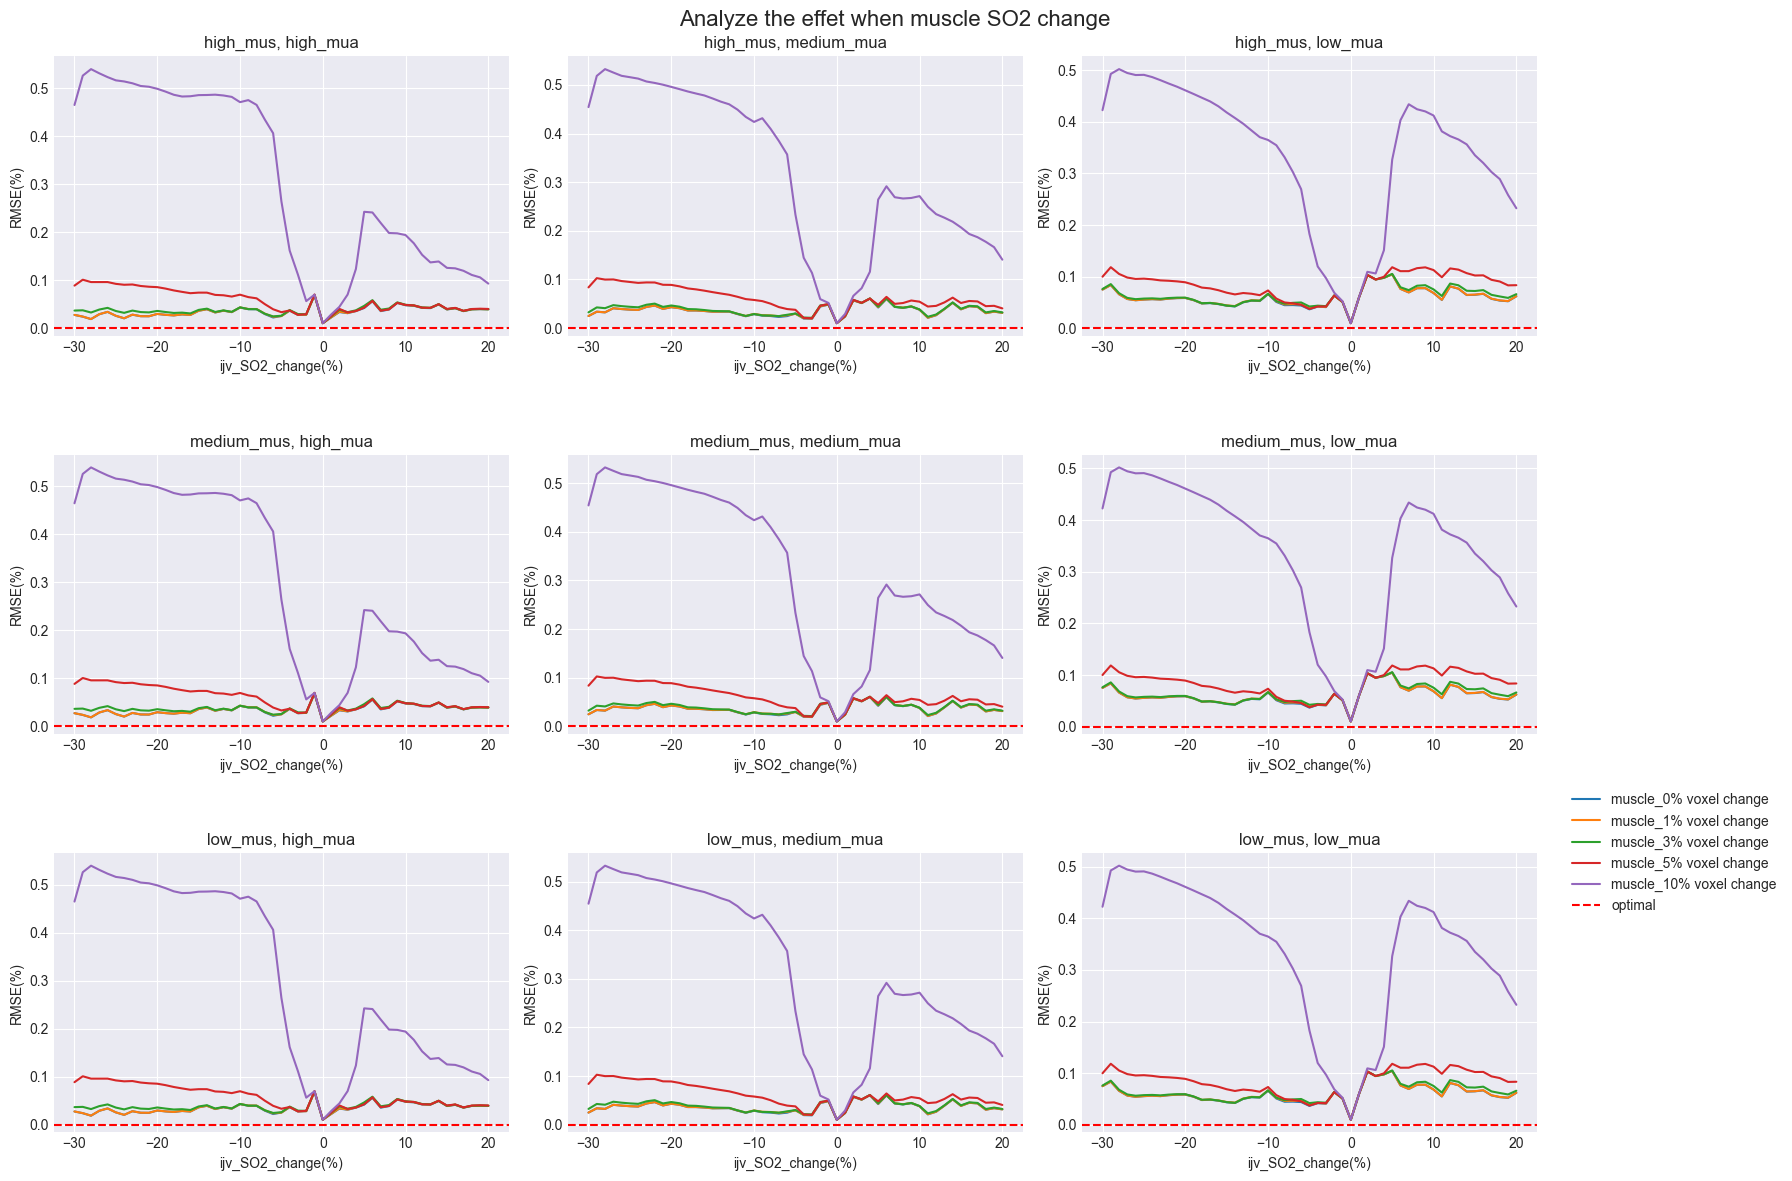

In [21]:
fig = plt.figure(figsize=(18,12))
fig.suptitle("Analyze the effet when muscle SO2 change", fontsize=16)
count = 1
for mus_type in mus_types:
    for mua_type in mua_types:
        ax = plt.subplot(int(f"33{count}"))
        ax.set_title(f"{mus_type}_mus, {mua_type}_mua")
        count += 1
        for muscle_type in muscle_types:
            data = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
            target_ijv_SO2 = data['target_ijv_SO2'].unique()
            muscle_SO2 = data['muscle_mua_change'].unique()
            
            error_df = {}
            RMSE = []
            for using_SO2 in target_ijv_SO2:
                error_df[using_SO2] = []
                error_df[using_SO2] += data[data['target_ijv_SO2'] == using_SO2]['error_ijv_SO2'].to_list()
                RMSE.append(np.sqrt(np.mean(np.square(data[data['target_ijv_SO2'] == using_SO2]['error_ijv_SO2'].to_numpy()))))
            
            ax.plot(target_ijv_SO2.astype(int), RMSE, label=f'{muscle_type}% voxel change')
        ax.axhline(y=0, color='r', linestyle='--',label="optimal")
        ax.set_xlabel("ijv_SO2_change(%)")
        ax.set_ylabel("RMSE(%)")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 1),
          fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig(os.path.join("pic", subject, result_folder, "individual.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [22]:
table = [['muscle_type', 'RMSE(%)', 'R_square'] ]
for muscle_type in muscle_types:
    count = 0
    for mus_type in mus_types:
        for mua_type in mua_types:
            if count == 0:
                data = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
            else:
                temp = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
                data = pd.concat((data, temp))
    RMSE = np.sqrt(np.mean(np.square(data['error_ijv_SO2'].to_numpy())))
    y_true = data['target_ijv_SO2'].to_numpy()
    y_pred = data['output_ijv_SO2'].to_numpy()
    R_square = cal_R_square(y_true, y_pred)
    
    row = [muscle_type, RMSE, R_square]
    table.append(row)
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════╤═══════════╤════════════╕
│ muscle_type   │   RMSE(%) │   R_square │
╞═══════════════╪═══════════╪════════════╡
│ muscle_0      │ 0.0632325 │   0.999982 │
├───────────────┼───────────┼────────────┤
│ muscle_1      │ 0.0635351 │   0.999982 │
├───────────────┼───────────┼────────────┤
│ muscle_3      │ 0.0661193 │   0.999981 │
├───────────────┼───────────┼────────────┤
│ muscle_5      │ 0.0891882 │   0.999965 │
├───────────────┼───────────┼────────────┤
│ muscle_10     │ 0.374685  │   0.999384 │
╘═══════════════╧═══════════╧════════════╛


In [23]:
print(tabulate(table, headers='firstrow', tablefmt='latex'))

\begin{tabular}{lrr}
\hline
 muscle\_type   &   RMSE(\%) &   R\_square \\
\hline
 muscle\_0      & 0.0632325 &   0.999982 \\
 muscle\_1      & 0.0635351 &   0.999982 \\
 muscle\_3      & 0.0661193 &   0.999981 \\
 muscle\_5      & 0.0891882 &   0.999965 \\
 muscle\_10     & 0.374685  &   0.999384 \\
\hline
\end{tabular}


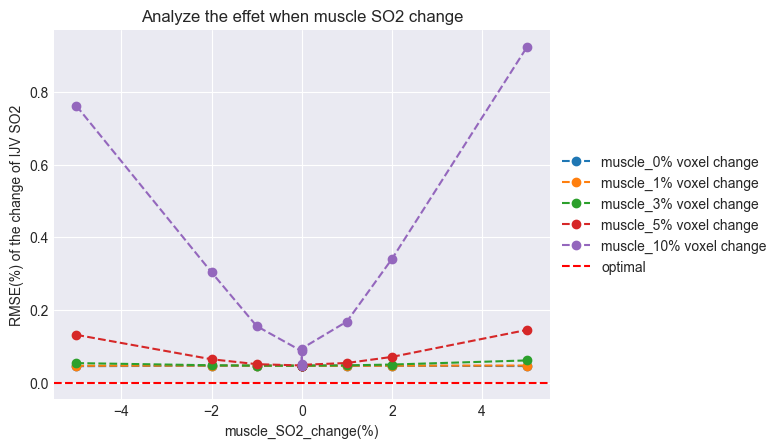

In [37]:
for muscle_type in muscle_types:
    count = 0
    for mus_type in mus_types:
        for mua_type in mua_types:
            if count == 0:
                data = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
            else:
                temp = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
                data = pd.concat((data, temp))
            count += 1
    
    error_df = {}
    RMSE = []
    for using_SO2 in muscle_SO2:
        error_df[using_SO2] = []
        error_df[using_SO2] += data[data['muscle_mua_change'] == using_SO2]['error_ijv_SO2'].to_list()
        RMSE.append(np.sqrt(np.mean(np.square(data[data['muscle_mua_change'] == using_SO2]['error_ijv_SO2'].to_numpy()))))
    # print(f'{muscle_type}% voxel change : len= {len(RMSE)} RMSE = {RMSE} ')
    plt.plot(muscle_SO2.astype(int), RMSE, 'o--', label=f'{muscle_type}% voxel change')
plt.axhline(y=0, color='r', linestyle='--',label="optimal")
plt.title("Analyze the effet when muscle SO2 change")
plt.xlabel("muscle_SO2_change(%)")
plt.ylabel("RMSE(%) of the change of IJV SO2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True)
plt.savefig(os.path.join("pic", subject, result_folder, "all_muscle.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

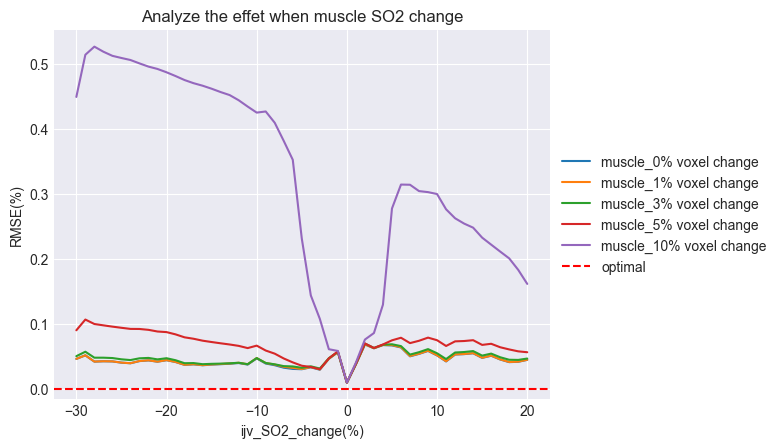

In [25]:
for muscle_type in muscle_types:
    count = 0
    for mus_type in mus_types:
        for mua_type in mua_types:
            if count == 0:
                data = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
            else:
                temp = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
                data = pd.concat((data, temp))
            count += 1
    
    error_df = {}
    RMSE = []
    for using_SO2 in target_ijv_SO2:
        error_df[using_SO2] = []
        error_df[using_SO2] += data[data['target_ijv_SO2'] == using_SO2]['error_ijv_SO2'].to_list()
        RMSE.append(np.sqrt(np.mean(np.square(data[data['target_ijv_SO2'] == using_SO2]['error_ijv_SO2'].to_numpy()))))
    plt.plot(target_ijv_SO2.astype(int), RMSE, label=f'{muscle_type}% voxel change')
plt.axhline(y=0, color='r', linestyle='--',label="optimal")
plt.title("Analyze the effet when muscle SO2 change")
plt.xlabel("ijv_SO2_change(%)")
plt.ylabel("RMSE(%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, shadow=True)
plt.savefig(os.path.join("pic", subject, result_folder, "all.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()

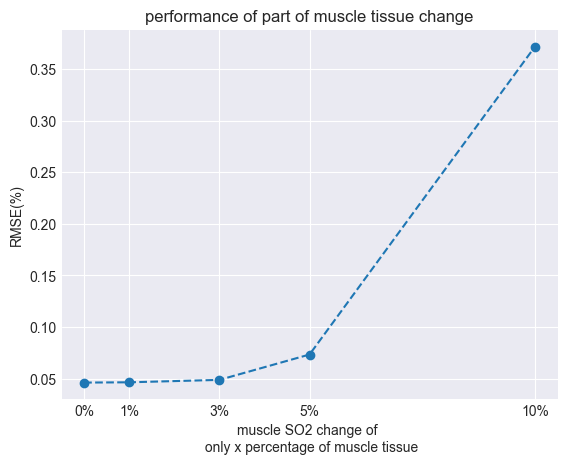

In [26]:
RMSE = []
for muscle_type in muscle_types:
    count = 0
    for mus_type in mus_types:
        for mua_type in mua_types:
            if count == 0:
                data = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
            else:
                temp = pd.read_csv(os.path.join("model_test", subject, f"{mus_type}_scatter_prediction_input_{muscle_type}", f"{mua_type}_absorption", "test.csv"))
                data = pd.concat((data, temp))
            count += 1
    RMSE.append(np.sqrt(np.mean(np.square(data['error_ijv_SO2'].to_numpy()))))
    
plt.plot([0,1,3,5,10], RMSE, 'o--')
plt.title("performance of part of muscle tissue change")
plt.xlabel("muscle SO2 change of \n only x percentage of muscle tissue")
plt.xticks([0,1,3,5,10], ['0%', '1%', '3%', '5%', '10%'])
plt.ylabel("RMSE(%)")
plt.savefig(os.path.join("pic", subject, result_folder, "muscle_change.png"), dpi=300, format='png', bbox_inches='tight')
plt.show()